#### Importing modules/libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

#### Loading dataset from Huggingface 

In [29]:
# load  dataset and split the data into train/validation/test datasets
from datasets import load_dataset, DatasetDict

# load  dataset and split the data into train/validation/test datasets
from datasets import load_dataset, DatasetDict

raw_datasets = load_dataset("financial_phrasebank", "sentences_50agree", split='train')
raw_datasets

Reusing dataset financial_phrasebank (C:\Users\minnu\.cache\huggingface\datasets\financial_phrasebank\sentences_50agree\1.0.0\a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


Dataset({
    features: ['sentence', 'label'],
    num_rows: 4846
})

In [30]:
raw_datasets.features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=3, names=['negative', 'neutral', 'positive'], names_file=None, id=None)}

The _raw datasets_ contains two columns 'sentence' and 'label'. Column _label_ has identified 3 sentiment classes: 0 for 'Negative', 1 for 'Neutral', and 2 for 'Positive'. 

#### Convert dataset_dictionary to pandas dataframe

In [31]:
df = pd.DataFrame.from_dict(raw_datasets)
df.head()

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,2
4,According to the company 's updated strategy f...,2


##### Drop duplicate sentences from the dataframe

In [32]:
df.drop_duplicates(subset=['sentence'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4838 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4838 non-null   object
 1   label     4838 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.4+ KB


There are a total of 4838 sentences in the dataframe. 

Create a column named **sentiment** in the dataframe

In [33]:
df.loc[df['label']==1,'sentiment'] = 'Neutral'
df.loc[df['label']==0,'sentiment'] = 'Negative'
df.loc[df['label']==2,'sentiment'] = 'Positive'
df.head()

,sentence,label,sentiment
0,"According to Gran , the company has no plans t...",1,Neutral
1,Technopolis plans to develop in stages an area...,1,Neutral
2,The international electronic industry company ...,0,Negative
3,With the new production plant the company woul...,2,Positive
4,According to the company 's updated strategy f...,2,Positive


In [34]:
# The distribution of sentiments

fig = px.pie(df, names='sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

The dataset contained about 60% sentences with neutral sentiment, 28% with positive and the rest 12% having negative sentiment. 


### Number of Characters

In [35]:
df['nr_of_char'] = df['sentence'].str.len()
df["nr_of_char"] = df["nr_of_char"] / df["nr_of_char"].max()
df[['sentiment', 'nr_of_char']].pivot(columns = 'sentiment', values = 'nr_of_char').iplot(kind = 'box')

### Number of Words

In [36]:
df['nr_of_words'] = df['sentence'].str.split().str.len()
df[['sentiment', 'nr_of_words']].pivot(columns = 'sentiment', values = 'nr_of_words').iplot(kind = 'box')

### Number of punctuation marks

In [37]:
df['nr_of_punc'] = df['sentence'].str.split(r"\?|,|\.|\!|\"|'").str.len()
df["nr_of_punc"] = df["nr_of_punc"] / df["nr_of_punc"].max()
df[['sentiment', 'nr_of_punc']].pivot(columns = 'sentiment', values = 'nr_of_punc').iplot(kind = 'box')

In [38]:
from wordcloud import WordCloud, STOPWORDS

#### Number of stopwords

In [39]:
stop_words = STOPWORDS
df['nr_of_stopwords'] = df['sentence'].str.split().apply(lambda x: len(set(x) & stop_words))
df['nr_of_stopwords'] = df['nr_of_stopwords'] / df['nr_of_stopwords'].max()
df[['sentiment', 'nr_of_stopwords']].pivot(columns = 'sentiment', values = 'nr_of_stopwords').iplot(kind = 'box')

In [40]:
df['nr_of_unique_words'] = df['sentence'].apply(lambda x: len(set(x.split())))
df["nr_of_unique_words"] = df["nr_of_unique_words"] / df["nr_of_unique_words"].max()
df.head()

,sentence,label,sentiment,nr_of_char,nr_of_words,nr_of_punc,nr_of_stopwords,nr_of_unique_words
0,"According to Gran , the company has no plans t...",1,Neutral,0.403175,25,0.111111,0.444444,0.413043
1,Technopolis plans to develop in stages an area...,1,Neutral,0.603175,31,0.111111,0.444444,0.608696
2,The international electronic industry company ...,0,Negative,0.723810,36,0.083333,0.388889,0.673913
3,With the new production plant the company woul...,2,Positive,0.653968,33,0.055556,0.444444,0.521739
4,According to the company 's updated strategy f...,2,Positive,0.644444,41,0.111111,0.444444,0.695652


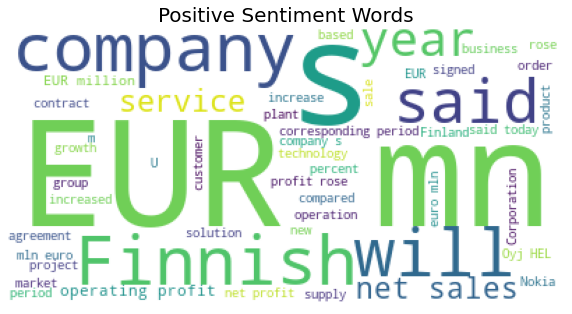

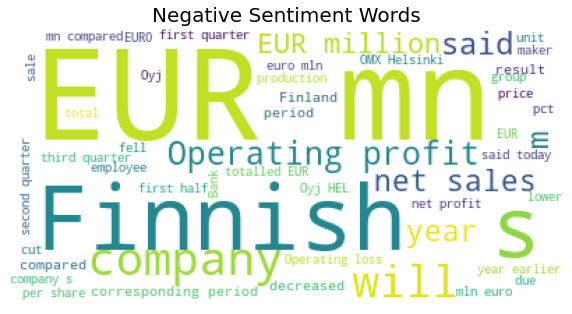

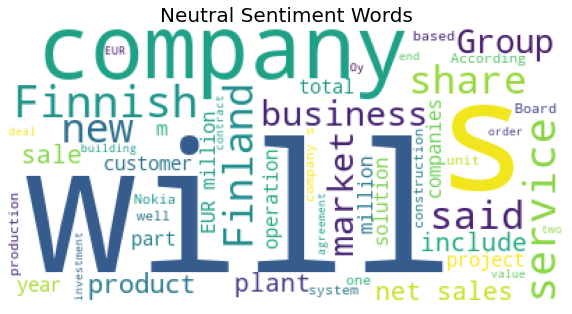

In [45]:
def wordcount_gen(df,sentiment):
    '''
    Generate Word Cloud
    inputs:
     - df: Tweets dataset
     - sentiment: Neutral/Negative/Positive
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.sentiment==sentiment]['sentence']])

    #initialize wordcloud object
    wc = WordCloud(background_color ='white', max_words=50, stopwords=STOPWORDS)

    #Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(sentiment), fontsize=20)
    plt.axis('off')

#Positive sentiment
wordcount_gen(df, 'Positive')

#Negative sentiment
wordcount_gen(df, 'Negative')

#Neutral sentiment
wordcount_gen(df,'Neutral')

